In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

In [3]:

#读取所需参数
configs = json.load(open('640-80-5-layers.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

In [4]:

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_5layers)08022023-175124-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Model Compiled
Time taken: 0:00:00.361178
[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_5layers)08022023-175124-e50.h5


In [5]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False
    #normalise=configs['data']['normalise']
)

# predict - 5layers is the best until now


In [6]:
# prediction part
predictions_multiseq_1 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=1,debug=False)


[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_2 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=2,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_4 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=4,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_8 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=8,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_16 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=16,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_32 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=32,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_48 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=48,debug=False)

[Model] Predicting Sequences Multiple...


In [6]:
predictions_multiseq_64 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=64,debug=False)

[Model] Predicting Sequences Multiple...


# CSV no (0,1) scaler
### no_scalar.csv

## (1) 1 points prediction

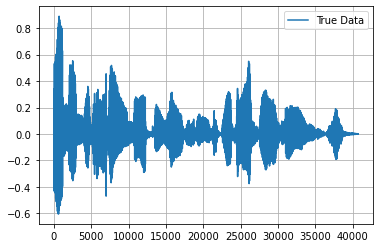

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_1, y_test, prediction_len=1)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [9]:
flat_predictions_multiseq_1 = flatten(predictions_multiseq_1)

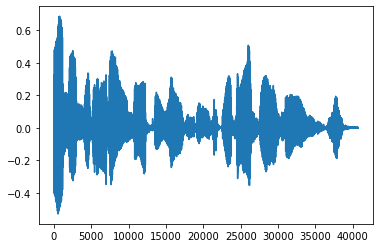

In [10]:
plt.plot(flat_predictions_multiseq_1)

In [11]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

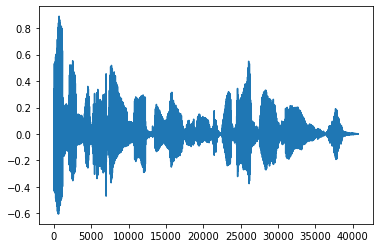

In [12]:
plt.plot(y_test_flatten)

In [13]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_1, rate=16000)

In [14]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [15]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-1-point-predicted.wav", flat_predictions_multiseq_1, sr)

## (2) 2 points prediction

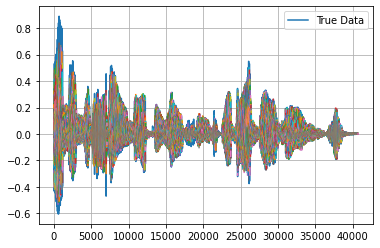

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_2, y_test, prediction_len=2)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

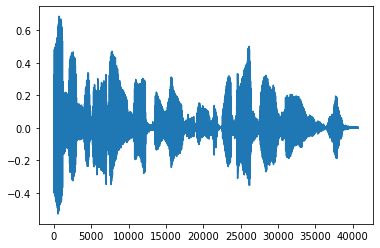

In [9]:
flat_predictions_multiseq_2 = flatten(predictions_multiseq_2)
plt.plot(flat_predictions_multiseq_2)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

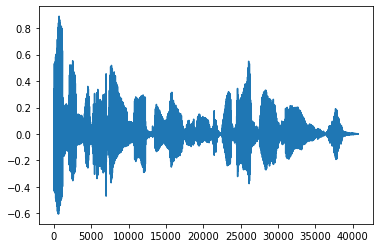

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_2, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-2-point-predicted.wav", flat_predictions_multiseq_2, sr)

## (3) 4 points prediction

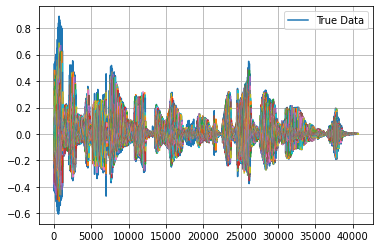

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_4, y_test, prediction_len=4)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

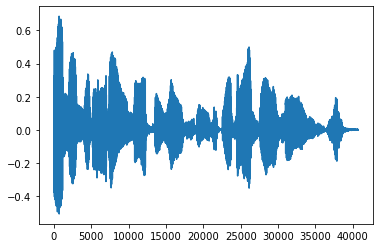

In [9]:
flat_predictions_multiseq_4 = flatten(predictions_multiseq_4)
plt.plot(flat_predictions_multiseq_4)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

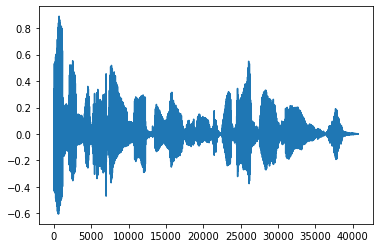

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_4, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-4-point-predicted.wav", flat_predictions_multiseq_4, sr)

## (4) 8 points prediction

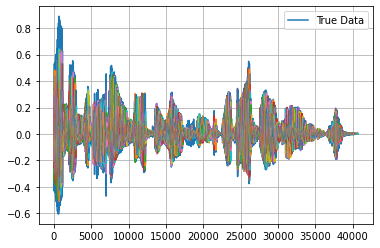

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_8, y_test, prediction_len=8)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

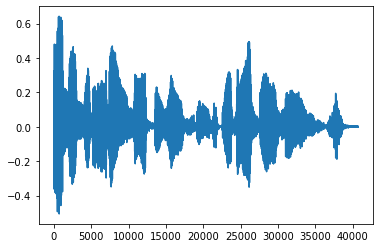

In [9]:
flat_predictions_multiseq_8 = flatten(predictions_multiseq_8)
plt.plot(flat_predictions_multiseq_8)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

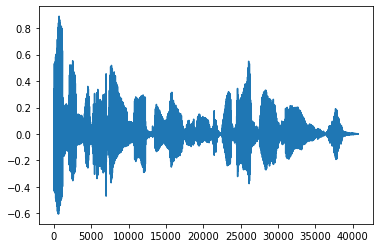

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_8, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-8-point-predicted.wav", flat_predictions_multiseq_8, sr)

## (5) 16 points prediction

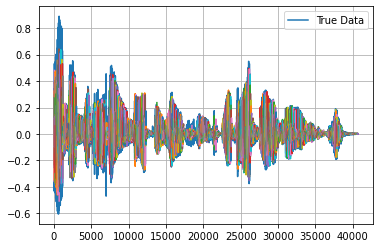

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_16, y_test, prediction_len=16)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

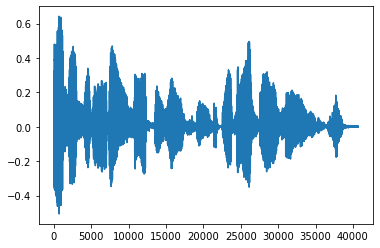

In [9]:
flat_predictions_multiseq_16 = flatten(predictions_multiseq_16)
plt.plot(flat_predictions_multiseq_16)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

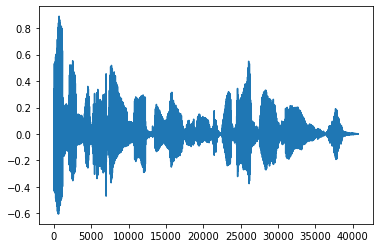

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_16, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-16-point-predicted.wav", flat_predictions_multiseq_16, sr)

## (6) 32 points prediction

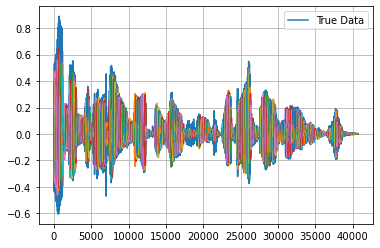

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_32, y_test, prediction_len=32)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

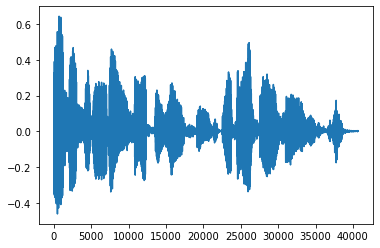

In [9]:
flat_predictions_multiseq_32 = flatten(predictions_multiseq_32)
plt.plot(flat_predictions_multiseq_32)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

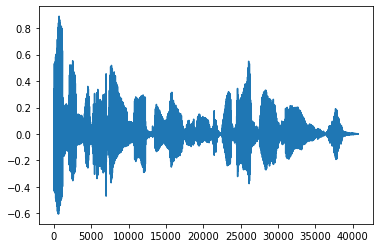

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_32, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-32-point-predicted.wav", flat_predictions_multiseq_32, sr)

## (7) 48 points prediction

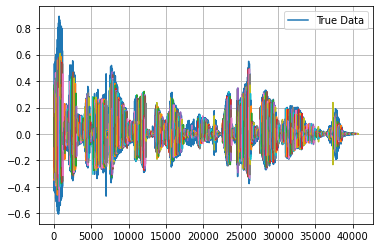

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_48, y_test, prediction_len=48)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

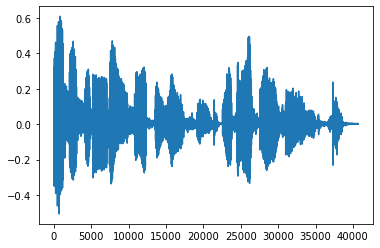

In [9]:
flat_predictions_multiseq_48 = flatten(predictions_multiseq_48)
plt.plot(flat_predictions_multiseq_48)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

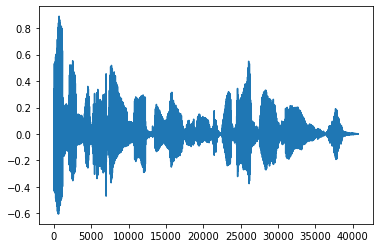

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_48, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-48-point-predicted.wav", flat_predictions_multiseq_48, sr)

## (8) 64 points prediction

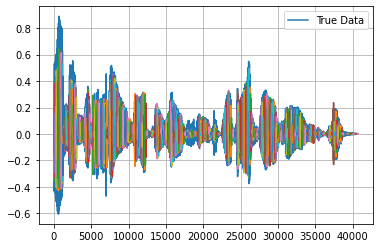

In [7]:
# no (0, 1)
# no normalization
plot_results_multiple(predictions_multiseq_64, y_test, prediction_len=64)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

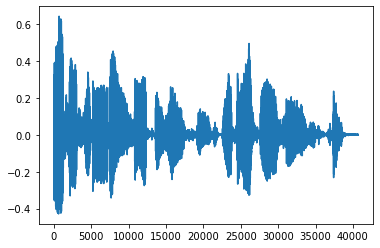

In [9]:
flat_predictions_multiseq_64 = flatten(predictions_multiseq_64)
plt.plot(flat_predictions_multiseq_64)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

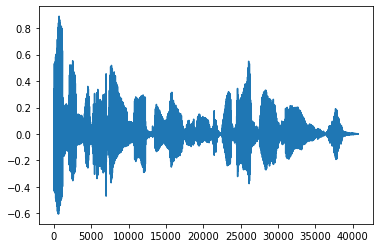

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_64, rate=16000)

In [13]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/diff_points_prediction/5layers-64-point-predicted.wav", flat_predictions_multiseq_64, sr)